In [1]:
import pandas as pd

In [2]:
humanist_vols = pd.read_csv('web_scraped_humanist_listserv.csv')

In [3]:
film_scripts = pd.read_csv('pudding_film_scripts.csv')

In [4]:
humanist_vols.dtypes

dates    object
text     object
url      object
dtype: object

In [5]:
film_scripts.dtypes

imdb_id                        object
script_id                       int64
title                          object
year                            int64
gross (inflation-adjusted)    float64
link                           object
dtype: object

In [6]:
type('test')

str

In [7]:
humanist_vols.head()

,dates,text,url
0,1987-1988,From: MCCARTY@UTOREPAS\nSubject: \nDate: 12 Ma...,https://humanist.kdl.kcl.ac.uk/Archives/Conver...
1,1988-1989,From: Sebastian Rahtz \nSubject: C++ and Gnu o...,https://humanist.kdl.kcl.ac.uk/Archives/Conver...
2,1989-1990,From: Willard McCarty \nSubject: Happy Birthda...,https://humanist.kdl.kcl.ac.uk/Archives/Conver...
3,1990-1991,From: Elaine Brennan & Allen Renear \nSubject:...,https://humanist.kdl.kcl.ac.uk/Archives/Conver...
4,1991-1992,From: Elaine Brennan & Allen Renear \nSubject:...,https://humanist.kdl.kcl.ac.uk/Archives/Conver...


In [8]:
# replace and contains
#df[‘column_name’].str.contains(‘pattern’)
# humanist_vols[(humanist_vols['dates'].str.contains('20') == True) &(humanist_vols['dates'].str.contains('19') == False)] 

# df[‘column_name’].str.replace(‘old_string’, ‘new_string’)

humanist_vols['cleaned_dates'] = humanist_vols['dates'].str.replace('-', '/')

In [9]:
'test_test2'.split('_')[1]

'test2'

In [10]:
humanist_vols['cleaned_dates'].str.split('/')

0     [1987, 1988]
1     [1988, 1989]
2     [1989, 1990]
3     [1990, 1991]
4     [1991, 1992]
5     [1992, 1993]
6     [1993, 1994]
7     [1994, 1995]
8     [1995, 1996]
9     [1996, 1997]
10    [1997, 1998]
11    [1998, 1999]
12    [1999, 2000]
13    [2000, 2001]
14    [2001, 2002]
15    [2002, 2003]
16    [2003, 2004]
17    [2004, 2005]
18    [2005, 2006]
19    [2006, 2007]
20    [2007, 2008]
Name: cleaned_dates, dtype: object

In [11]:
humanist_vols['year_start'] = humanist_vols['cleaned_dates'].str.split('/').str[0]
humanist_vols['year_end'] = humanist_vols['cleaned_dates'].str.split('/').str[1]

In [12]:
humanist_vols['volume_size'] = humanist_vols['text'].str.count('\n')

<AxesSubplot:xlabel='year_start'>

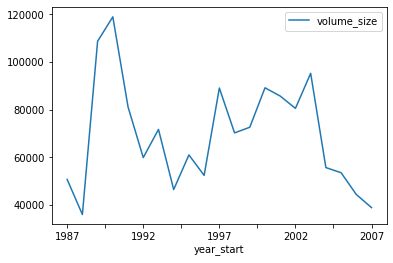

In [13]:
humanist_vols.plot(x='year_start', y='volume_size', kind='line')

<AxesSubplot:xlabel='year_start'>

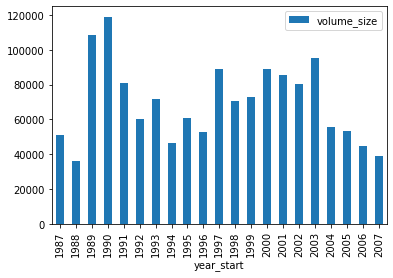

In [14]:
humanist_vols.plot(x='year_start', y='volume_size', kind='bar')

In [27]:
humanist_vols['humanities_computing_counts'] = humanist_vols['text'].str.count('Humanities Computing')
humanist_vols['digital_humanities_counts'] = humanist_vols['text'].str.count('Digital Humanities')


<AxesSubplot:>

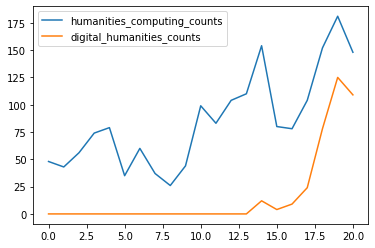

In [28]:
humanist_vols[['humanities_computing_counts', 'digital_humanities_counts']].plot()

In [19]:
import nltk
from nltk import word_tokenize
from nltk import FreqDist

In [26]:
sum(humanist_vols[0:2]['text'].map(word_tokenize), [])

['From',
 ':',
 'MCCARTY',
 '@',
 'UTOREPAS',
 'Subject',
 ':',
 'Date',
 ':',
 '12',
 'May',
 '1987',
 ',',
 '23:50:02',
 'EDT',
 'X-Humanist',
 ':',
 'Vol',
 '.',
 '1',
 'Num',
 '.',
 '1',
 '(',
 '1',
 ')',
 'This',
 'is',
 'test',
 'number',
 '1',
 '.',
 'Please',
 'acknowledge',
 '.',
 'From',
 ':',
 'MCCARTY',
 '@',
 'UTOREPAS',
 'Subject',
 ':',
 'Date',
 ':',
 '13',
 'May',
 '1987',
 ',',
 '00:06:41',
 'EDT',
 'X-Humanist',
 ':',
 'Vol',
 '.',
 '1',
 'Num',
 '.',
 '2',
 '(',
 '2',
 ')',
 'This',
 'is',
 'test',
 'number',
 '2',
 '.',
 'Please',
 'acknowledge',
 '.',
 'From',
 ':',
 'MCCARTY',
 '@',
 'UTOREPAS',
 'Subject',
 ':',
 'Date',
 ':',
 '13',
 'May',
 '1987',
 ',',
 '23:08:57',
 'EDT',
 'X-Humanist',
 ':',
 'Vol',
 '.',
 '1',
 'Num',
 '.',
 '3',
 '(',
 '3',
 ')',
 'This',
 'is',
 'a',
 'test',
 'of',
 'a',
 'new',
 'BITNET',
 'mailer',
 'for',
 'people',
 'involved',
 'with',
 'the',
 'support',
 'of',
 'computing',
 'in',
 'the',
 'humanities',
 '.',
 'Please',
 'acknow

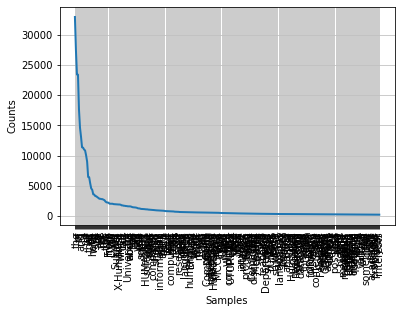

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [24]:
tokens = FreqDist(sum(humanist_vols[0:2]['text'].map(word_tokenize), []))


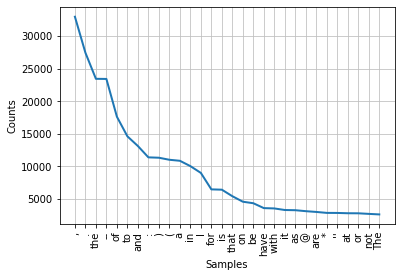

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [25]:
tokens.plot(30)

In [29]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()

In [31]:
pd.options.mode.chained_assignment = None  # default='warn'

In [32]:

subset_humanist_vols = humanist_vols[0:2]

def stem_words(row):
    stemmed_words = ''
    for token in row.split(' '):
        stemmed_words += porter.stem(token) + ' '
    return stemmed_words

subset_humanist_vols['stemmed_text'] = subset_humanist_vols.text.apply(stem_words)

In [ ]:
print(subset_humanist_vols[0:1]['stemmed_text'].values)

In [ ]:
def lemmatize_words(row):
    #Code goes here

subset_humanist_vols.apply(lemmatize_words)

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

#save our texts to a list
documents = humanist_vols.text.tolist()

#Create a vectorizer
vectorizer = TfidfVectorizer(max_df=0.9, min_df=2)

In [50]:
# Fit the vectorizer to our emails
transformed_documents = vectorizer.fit_transform(documents)

# Now get the top features for each document
transformed_documents_as_array = transformed_documents.toarray()

dates = humanist_vols.dates.tolist()
tfidf_results = []
for counter, doc in enumerate(transformed_documents_as_array):
    # construct a dataframe
    tf_idf_tuples = list(zip(vectorizer.get_feature_names(), doc))
    one_doc_as_df = pd.DataFrame.from_records(tf_idf_tuples, columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)
    one_doc_as_df['dates'] = dates[counter]
    tfidf_results.append(one_doc_as_df)


/Users/EZCorp/Sites/IS310/is310_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/EZCorp/Sites/IS310/is310_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/EZCorp/Sites/IS310/is310_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/EZCorp/Sites/IS310/is310_env/lib/python3.9/site-packages/sklearn/util

In [52]:
import warnings
warnings.filterwarnings("ignore")

In [53]:
tfidf_df = pd.concat(tfidf_results)
tfidf_df = tfidf_df.sort_values(by=['score'], ascending=False)
tfidf_df.head(10)


,term,score,dates
0,http,0.704104,2000-2001
0,http,0.702940,1999-2000
0,http,0.688043,1998-1999
0,http,0.651086,1997-1998
0,utorepas,0.648617,1987-1988
0,http,0.624448,2001-2002
0,http,0.605409,2007-2008
0,http,0.595785,2004-2005
0,http,0.590306,2003-2004
0,bitnet,0.587312,1989-1990


In [54]:
print(tfidf_df[0:200].term.unique())


['http' 'utorepas' 'bitnet' 'www' '2007' '1997' '2006' '2004' '1996'
 '2005' '2002' '2003' 'ninch' 'gopher' 'html' '1998' '2008' '1999' 'astra'
 'ippe' 'vax' 'saddam' 'uottawa' 'doi' 'prolog' 'qs' 'amico' 'kraft' 'cdt'
 'acadvm1' '1007' 'hussein' 'penndrls' 'fqs' '441495' 'kessler' 'cst' 'na'
 'celia' 'epas' 'tlg' 'brownvm' 'neach' 'carf' 'forks' 'werman' 'xxx'
 'wmccarty' 'rahtz' 'htm' 'unicode' 'dfl' 'mellen' 'ocp' 'sanskrit'
 'kevitt' 'pacling' 'bene' 'waxweb' 'iraq' 'missile' 'idbsu' 'earn'
 'wikipedia' 'easi' 'vspace' 'pali' 'ruhc' 'ubiquity' 'kurzweil' 'nota'
 'coombs' 'kleio' 'iee' 'url' 'google' 'cti' 'kentvm' 'giampapa' 'rs'
 'hurd' 'aaai' 'hypercard' 'cont' 'gas' 'chiba' 'neder' 'snobol' '3dx'
 'mcswain' 'strangelove' 'fonorola' 'texpert' 'pdt' 'cdn' 'preprints'
 'ccat' 'mainframe' 'mccarty_at_kcl' 'earli']


In [58]:
humanist_vols.text.str.count('computer')

0     1310
1      504
2     2355
3     1319
4      851
5      592
6      604
7      287
8      525
9      389
10     541
11     343
12     341
13     486
14     374
15     288
16     391
17     227
18     264
19     233
20     229
Name: text, dtype: int64